# Feature Selection with Variable Importance

In [ ]:
# Windows use in Jupyter notebook
# ! pip install xgboost

In [ ]:
# Mac OS open Terminal then use
# sudo pip install xgboost

In [ ]:
# Mac OS may also try from the Terminal
# conda install py-xgboost

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot

In [3]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
dataset = pd.read_csv('diabetes.csv')

In [6]:
dataset[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
dataset.shape

(768, 9)

In [8]:
X = dataset.drop(['Outcome'],axis = 1)
Y = dataset.Outcome

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,
                                                random_state = 1)

In [10]:
y_train.shape

(514,)

In [11]:
y_test.shape

(254,)

In [12]:
model = XGBClassifier(n_estimators = 100,learning_rate = 0.10)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [13]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7834645669291339

### test subset of features by importance

In [14]:
importance = model.feature_importances_*100

In [15]:
importances = pd.DataFrame({'Importance':importance},index = X.columns)

In [16]:
importances

,Importance
Pregnancies,9.570684
Glucose,27.991962
BloodPressure,8.152946
SkinThickness,6.598003
Insulin,8.882334
BMI,16.970392
PedigreeFunc,9.298628
Age,12.535053


In [17]:
thresholds = importances.sort_values(by='Importance',axis = 0, ascending = True)

In [18]:
thresholds

,Importance
SkinThickness,6.598003
BloodPressure,8.152946
Insulin,8.882334
PedigreeFunc,9.298628
Pregnancies,9.570684
Age,12.535053
BMI,16.970392
Glucose,27.991962


In [19]:
import matplotlib.pyplot as plt

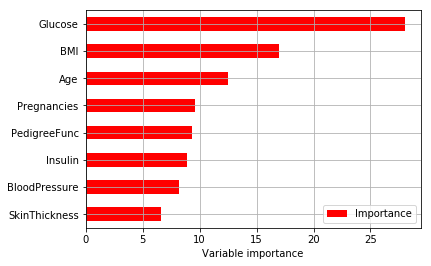

In [20]:
thresholds.plot(kind = 'barh',color = 'r')
plt.xlabel('Variable importance')
plt.grid()

In [21]:
thresholds = sorted(model.feature_importances_,reverse = True)

In [22]:
thresholds

[0.27991962,
 0.16970392,
 0.12535053,
 0.09570684,
 0.09298628,
 0.08882333,
 0.08152946,
 0.06598003]

In [23]:
type(thresholds)

list

In [24]:
# fit each subset of features by importance
# starting with the most important, ending with all features

In [25]:
for thresh in thresholds:
    selection = SelectFromModel(model,threshold = thresh, prefit = True)
    X_train_selected = selection.transform(X_train)
    X_test_selected = selection.transform(X_test)
    
    model2 = XGBClassifier()
    model2.fit(X_train_selected,y_train)
    predictions = model2.predict(X_test_selected)
    accuracy = accuracy_score(y_test,predictions)*100
    n_features = X_train_selected.shape[1]
    print('Thresh=%.3f,n=%d,Accuracy: %.2f%%' % (thresh,n_features,accuracy))

Thresh=0.280,n=1,Accuracy: 74.80%
Thresh=0.170,n=2,Accuracy: 75.59%
Thresh=0.125,n=3,Accuracy: 79.53%
Thresh=0.096,n=4,Accuracy: 80.31%
Thresh=0.093,n=5,Accuracy: 78.35%
Thresh=0.089,n=6,Accuracy: 79.13%
Thresh=0.082,n=7,Accuracy: 80.71%
Thresh=0.066,n=8,Accuracy: 78.35%


In [26]:
# only first three features are good enough

## show performance after each additional tree

In [27]:
# test set performance

In [28]:
eval_set = [(X_test,y_test)]

In [29]:
# verbose = True will list 'error rate' after each additional tree

In [30]:
model = XGBClassifier(n_estimators =100,learning_rate = 0.10)
model.fit(X_train,y_train, eval_metric='error',eval_set = eval_set,verbose = True)

[0]	validation_0-error:0.204724
[1]	validation_0-error:0.216535
[2]	validation_0-error:0.208661
[3]	validation_0-error:0.216535
[4]	validation_0-error:0.208661
[5]	validation_0-error:0.208661
[6]	validation_0-error:0.204724
[7]	validation_0-error:0.200787
[8]	validation_0-error:0.200787
[9]	validation_0-error:0.200787
[10]	validation_0-error:0.208661
[11]	validation_0-error:0.208661
[12]	validation_0-error:0.204724
[13]	validation_0-error:0.208661
[14]	validation_0-error:0.208661
[15]	validation_0-error:0.212598
[16]	validation_0-error:0.220472
[17]	validation_0-error:0.212598
[18]	validation_0-error:0.216535
[19]	validation_0-error:0.212598
[20]	validation_0-error:0.216535
[21]	validation_0-error:0.212598
[22]	validation_0-error:0.212598
[23]	validation_0-error:0.212598
[24]	validation_0-error:0.208661
[25]	validation_0-error:0.204724
[26]	validation_0-error:0.204724
[27]	validation_0-error:0.204724
[28]	validation_0-error:0.200787
[29]	validation_0-error:0.200787
[30]	validation_0-er

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [31]:
accuracy = accuracy_score(y_test,model.predict(X_test))
accuracy

0.7834645669291339

In [32]:
# which is

In [33]:
(1-0.216535)*100

78.34649999999999

In [34]:
# now we ask for both train and test loglosses

In [35]:
eval_set = [(X_train,y_train),(X_test,y_test)]

In [36]:
# logloss

In [37]:
model = XGBClassifier()
model.fit(X_train,y_train,eval_metric=['logloss'],
         eval_set = eval_set,verbose = True)

[0]	validation_0-logloss:0.65788	validation_1-logloss:0.655346
[1]	validation_0-logloss:0.628762	validation_1-logloss:0.624793
[2]	validation_0-logloss:0.604005	validation_1-logloss:0.600539
[3]	validation_0-logloss:0.582058	validation_1-logloss:0.581588
[4]	validation_0-logloss:0.563951	validation_1-logloss:0.56345
[5]	validation_0-logloss:0.547051	validation_1-logloss:0.550083
[6]	validation_0-logloss:0.532555	validation_1-logloss:0.537342
[7]	validation_0-logloss:0.519139	validation_1-logloss:0.527344
[8]	validation_0-logloss:0.507558	validation_1-logloss:0.517816
[9]	validation_0-logloss:0.497403	validation_1-logloss:0.508975
[10]	validation_0-logloss:0.487708	validation_1-logloss:0.501102
[11]	validation_0-logloss:0.479711	validation_1-logloss:0.492523
[12]	validation_0-logloss:0.471523	validation_1-logloss:0.488099
[13]	validation_0-logloss:0.464849	validation_1-logloss:0.481677
[14]	validation_0-logloss:0.457956	validation_1-logloss:0.476013
[15]	validation_0-logloss:0.451947	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [38]:
# store sequence of loglosses

In [39]:
results = model.evals_result()
type(results)

dict

In [40]:
train_performance = results['validation_0']['logloss']
test_performance = results['validation_1']['logloss']

In [41]:
train_performance[:5]

[0.65788, 0.628762, 0.604005, 0.582058, 0.563951]

In [42]:
xaxis = range(100)

In [43]:
# plot

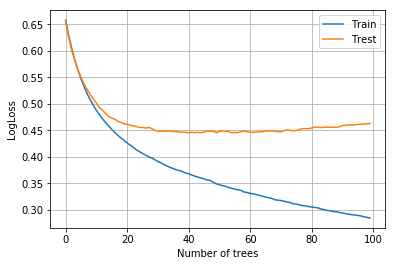

In [44]:
fig, ax = pyplot.subplots()
ax.plot(xaxis,train_performance,label = 'Train')
ax.plot(xaxis,test_performance,label = 'Trest')
ax.legend()
pyplot.xlabel('Number of trees')
pyplot.ylabel('LogLoss')
pyplot.grid()

In [45]:
# may stop the learning somewhere around 40 boosted trees

### show train and test error rates after each additional tree

In [46]:
model = XGBClassifier()
model.fit(X_train,y_train,eval_metric=['error'],
         eval_set = eval_set,verbose = True)

[0]	validation_0-error:0.22179	validation_1-error:0.204724
[1]	validation_0-error:0.223735	validation_1-error:0.216535
[2]	validation_0-error:0.217899	validation_1-error:0.208661
[3]	validation_0-error:0.202335	validation_1-error:0.216535
[4]	validation_0-error:0.208171	validation_1-error:0.208661
[5]	validation_0-error:0.206226	validation_1-error:0.208661
[6]	validation_0-error:0.200389	validation_1-error:0.204724
[7]	validation_0-error:0.196498	validation_1-error:0.200787
[8]	validation_0-error:0.198444	validation_1-error:0.200787
[9]	validation_0-error:0.198444	validation_1-error:0.200787
[10]	validation_0-error:0.190661	validation_1-error:0.208661
[11]	validation_0-error:0.182879	validation_1-error:0.208661
[12]	validation_0-error:0.180934	validation_1-error:0.204724
[13]	validation_0-error:0.182879	validation_1-error:0.208661
[14]	validation_0-error:0.178988	validation_1-error:0.208661
[15]	validation_0-error:0.178988	validation_1-error:0.212598
[16]	validation_0-error:0.173152	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [47]:
# store error rates

In [48]:
results = model.evals_result()

In [49]:
train_performance = results['validation_0']['error']
test_performance = results['validation_1']['error']

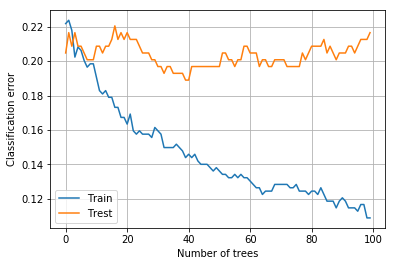

In [50]:
fig, ax = pyplot.subplots()
ax.plot(xaxis,train_performance,label = 'Train')
ax.plot(xaxis,test_performance,label = 'Trest')
ax.legend()
pyplot.xlabel('Number of trees')
pyplot.ylabel('Classification error')
pyplot.grid()

In [51]:
# stop the learning at 40 trees

## Early stopping

In [52]:
# "rounds" is a window over which no (test set) improvement is observed

In [53]:
model = XGBClassifier()
eval_set = [(X_test,y_test)]
model.fit(X_train,y_train,early_stopping_rounds = 10,
         eval_metric ='logloss',
         eval_set = eval_set,verbose = True)

[0]	validation_0-logloss:0.655346
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.624793
[2]	validation_0-logloss:0.600539
[3]	validation_0-logloss:0.581588
[4]	validation_0-logloss:0.56345
[5]	validation_0-logloss:0.550083
[6]	validation_0-logloss:0.537342
[7]	validation_0-logloss:0.527344
[8]	validation_0-logloss:0.517816
[9]	validation_0-logloss:0.508975
[10]	validation_0-logloss:0.501102
[11]	validation_0-logloss:0.492523
[12]	validation_0-logloss:0.488099
[13]	validation_0-logloss:0.481677
[14]	validation_0-logloss:0.476013
[15]	validation_0-logloss:0.473317
[16]	validation_0-logloss:0.470953
[17]	validation_0-logloss:0.467015
[18]	validation_0-logloss:0.465018
[19]	validation_0-logloss:0.462345
[20]	validation_0-logloss:0.461446
[21]	validation_0-logloss:0.459869
[22]	validation_0-logloss:0.458658
[23]	validation_0-logloss:0.457215
[24]	validation_0-logloss:0.455284
[25]	validation_0-logloss:0.4556
[26]	validation_0-logloss:0.454292


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [54]:
# no clear improvement between 36th and 45th tree

In [55]:
# it is suggested to stop training at 40th tree

### Tune the number of trees -Kfold cross validation

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [57]:
# grid search on the number of trees from 20 to 80

In [58]:
n_estimators = range(20,80,10)

In [59]:
model = XGBClassifier()

In [60]:
# n_estimators is defined in the GridSearchCV (not in XGBClassifier)

In [61]:
param_grid = dict(n_estimators = n_estimators)

In [62]:
# GridSearchCV uses neg_log_loss, XGBClassifier().fit() uses logloss

In [63]:
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state =1)
grid_search = GridSearchCV(model,param_grid,scoring ='neg_log_loss',cv=kfold)
grid_result = grid_search.fit(X,Y)

In [64]:
# results

In [65]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: -0.480157 using {'n_estimators': 50}


In [66]:
means = grid_result.cv_results_['mean_test_score']
n_trees = list(n_estimators)

In [67]:
df = pd.DataFrame()
df['params'] = n_trees
df['mean test score'] = means
df

,params,mean test score
0,20,-0.493858
1,30,-0.483538
2,40,-0.480428
3,50,-0.480157
4,60,-0.482531
5,70,-0.484747


In [68]:
# plot

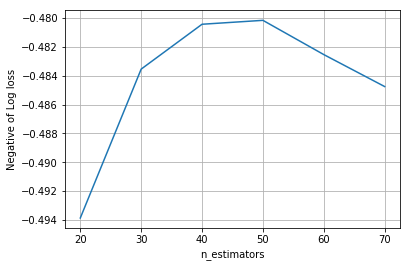

In [70]:
pyplot.plot(n_estimators,means)
pyplot.xlabel('n_estimators')
pyplot.ylabel('Negative of Log loss')
pyplot.grid()

In [71]:
# best number of trees is 50

## Tuning Tree depth -Kfold cross validation

In [72]:
# try depth from 1 to 10

In [73]:
depth_values = range(1,11,2)

In [74]:
param_grid = dict(max_depth = depth_values)

In [75]:
model = XGBClassifier()

In [76]:
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state =1)
grid_search = GridSearchCV(model,param_grid,scoring ='neg_log_loss',cv=kfold)
grid_result = grid_search.fit(X,Y)

In [77]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: -0.475544 using {'max_depth': 1}


In [79]:
means = grid_result.cv_results_['mean_test_score']

In [80]:
df = pd.DataFrame()
df['params'] = depth_values
df['mean test score'] = means
df

,params,mean test score
0,1,-0.475544
1,3,-0.489764
2,5,-0.536786
3,7,-0.579517
4,9,-0.595122


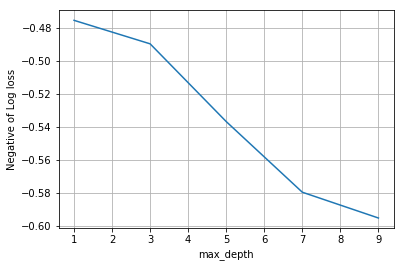

In [81]:
pyplot.plot(depth_values,means)
pyplot.xlabel('max_depth')
pyplot.ylabel('Negative of Log loss')
pyplot.grid()

In [ ]:
# best depth is 1 level (a stump)

## Tune the number and depth of trees

In [82]:
n_estimators = range(30,90,10)
depth_values = [1,2,3]

In [83]:
param_grid = dict(max_depth=depth_values,n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits =10, shuffle=True, random_state = 1)

In [84]:
model = XGBClassifier()
grid_search = GridSearchCV(model,param_grid,scoring = 'neg_log_loss',cv=kfold)
grid_result = grid_search.fit(X,Y)

In [85]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: -0.470468 using {'max_depth': 2, 'n_estimators': 70}


In [86]:
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

In [87]:
df = pd.DataFrame()
df['params'] = params
df['mean test score'] = means
df

,params,mean test score
0,"{'max_depth': 1, 'n_estimators': 30}",-0.509009
1,"{'max_depth': 1, 'n_estimators': 40}",-0.498496
2,"{'max_depth': 1, 'n_estimators': 50}",-0.488811
3,"{'max_depth': 1, 'n_estimators': 60}",-0.483079
4,"{'max_depth': 1, 'n_estimators': 70}",-0.480284
5,"{'max_depth': 1, 'n_estimators': 80}",-0.478670
6,"{'max_depth': 2, 'n_estimators': 30}",-0.485470
7,"{'max_depth': 2, 'n_estimators': 40}",-0.479437
8,"{'max_depth': 2, 'n_estimators': 50}",-0.475962
9,"{'max_depth': 2, 'n_estimators': 60}",-0.474063


In [88]:
# params is list, each element in the list is a dictionary

In [89]:
scores = np.array(means).reshape(3,6)
df = pd.DataFrame(scores)
df.columns = n_estimators
df.index = depth_values
df

,30,40,50,60,70,80
1,-0.509009,-0.498496,-0.488811,-0.483079,-0.480284,-0.478670
2,-0.485470,-0.479437,-0.475962,-0.474063,-0.470468,-0.471607
3,-0.483538,-0.480428,-0.480157,-0.482531,-0.484747,-0.486908


In [90]:
scores[1]

array([-0.48546955, -0.47943711, -0.4759618 , -0.47406253, -0.47046804,
       -0.47160681])

In [91]:
# scores[i] is the ith row

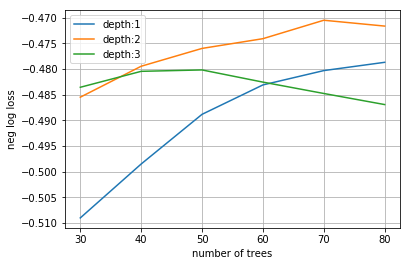

In [92]:
for i, value in enumerate(depth_values):
    pyplot.plot(n_estimators,scores[i],label = 'depth:' + str(value))
pyplot.legend()
pyplot.xlabel('number of trees')
pyplot.ylabel('neg log loss')
pyplot.grid()

In [93]:
# best tuning: depth 2 with 70 trees

## Tuning the learning rate and number of trees -Kfold cross validation

In [94]:
n_estimators = range(30,90,10)
rates = [0.01,0.1,0.2]

In [95]:
param_grid = dict(learning_rate = rates, n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits=10,shuffle = True, random_state = 1)

In [96]:
model = XGBClassifier()
grid_search = GridSearchCV(model,param_grid,scoring = 'neg_log_loss',cv=kfold)
grid_result = grid_search.fit(X,Y)

In [97]:
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

In [98]:
# plot

In [99]:
scores = np.array(means).reshape(3,6)
scores

array([[-0.61264947, -0.5941081 , -0.57870002, -0.56557359, -0.55495154,
        -0.5460606 ],
       [-0.48353789, -0.48042832, -0.4801573 , -0.48253055, -0.48474694,
        -0.48690844],
       [-0.48379849, -0.49033485, -0.49470035, -0.50254938, -0.51195319,
        -0.52010073]])

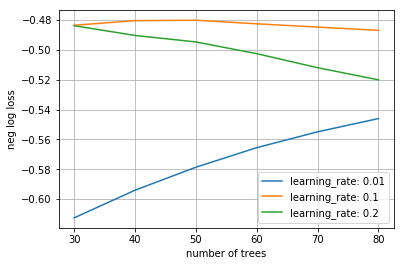

In [100]:
for i, value in enumerate(rates):
    pyplot.plot(n_estimators,scores[i],label='learning_rate: '+str(value))
pyplot.legend()
pyplot.xlabel('number of trees')
pyplot.ylabel('neg log loss')
pyplot.grid()

In [101]:
# best learning rate is 0.1 for all number of trees

In [102]:
# best number of trees is 40 and 50